<a href="https://colab.research.google.com/github/arunchaudhary147/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_Arun_Chaudhary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NETFLIX MOVIES AND TV SHOWS CLUSTERING**

# **Project Summary -**

This is an Unsupervised Machine learning project. In this project i will have to build a model that can be capable of clustering different-different types of data. The dataset is about netflix shows which has 7787 rows and 12 columns like show_id which represents ID of the show, type represents type of the show, title represents show title, cast represents name of the casting stars, country represents the country of the show, date added represents the date when the show is added to netflix, release-year represents the year the show was released,rating represents the rating of the show, duration represents the length of the show, listed_in tells what type and where the show belongs from, description gives short descriptions about the show. My task is to read and understand the data after that I will have to show some meaningfull charts and explain everything about the chart then according to the visualization chart I will have to make some hypothesis assumptions about the project then testing the assumptions. Then I will handle missing and null values and outliers after completing these all task I will look for imbalanced data if there is any imbalanced data then i will have to deal with that. Then i will select some important features further i will split the data for test and training purpose.


# **GitHub Link -** https://github.com/arunchaudhary147

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# ***Let's Begin !***

## ***1. Know Your Data***

### **Import Libraries**

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Dataset Loading**

In [6]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### **Dataset First View**

In [7]:
# Top 5 Rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
# Last 5 Rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...



### **Dataset Rows & Columns count**

In [9]:
# Get the count of rows and columns
num_rows, num_columns = df.shape

# Display the count
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7787
Number of columns: 12


We have 7787 Rows and 12 Column to Analyze.

### **Dataset Information**

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [11]:
# Checking the shape of the dataframe
df.shape

(7787, 12)

### **Duplicate Values**

In [12]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### There are no duplicated values.

### **Missing Values/Null Values**

In [13]:
# Missing Values/Null Values Count
df.isnull().sum().sum()

3631

There are total 3631 null values in the dataset. 2389 null values in director column, 718 null values in cast column, 507 null values in country column, 10 in date_added column and 7 in rating column. So we need to handle the null values.

### **Handling Null Values** -



In [14]:
# Checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

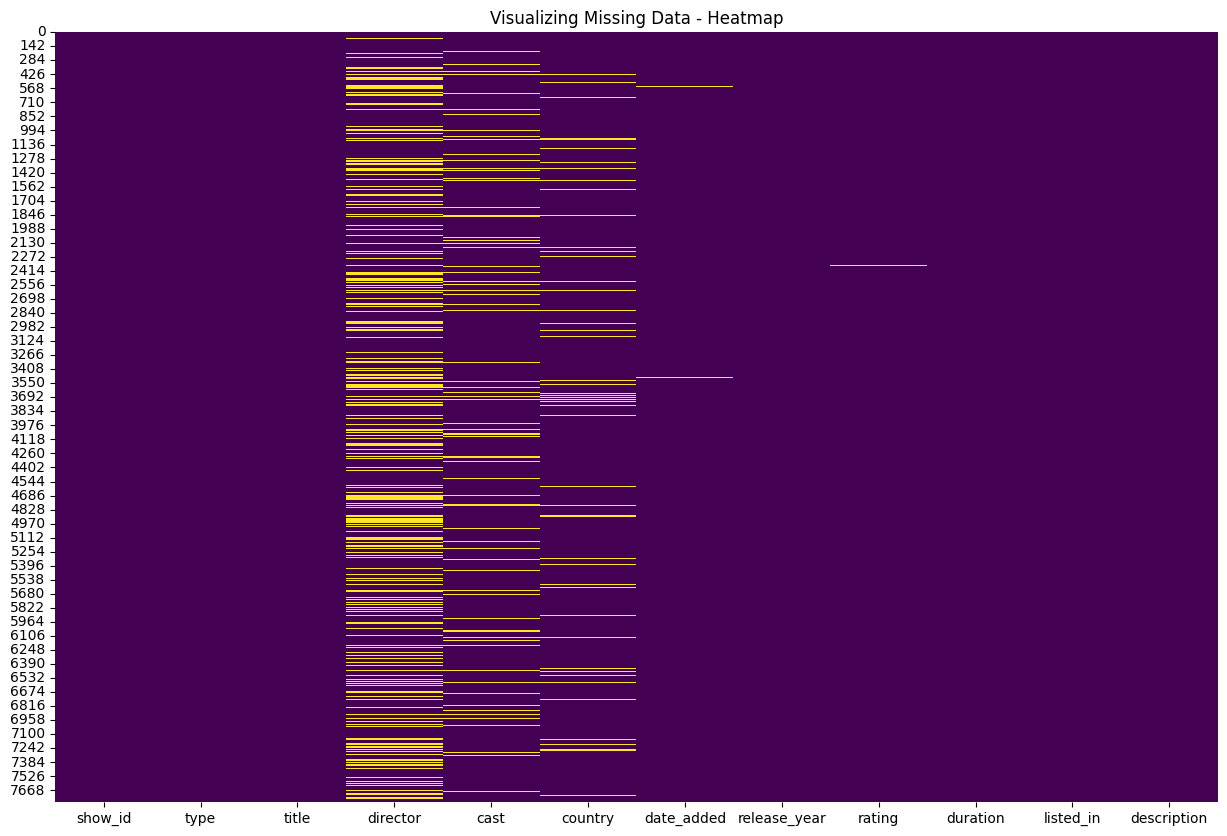

In [15]:
# Visualizing the missing values
# Create a DataFrame indicating missing values
missing_data = df.isnull()

# Set up the Matplotlib figure
plt.figure(figsize=(15, 10))

# Use seaborn to create a heatmap
sns.heatmap(missing_data, cmap='viridis', cbar=False)

# Add title and display the plot
plt.title('Visualizing Missing Data - Heatmap')
plt.show()

In [16]:
# Handling Null Values
# Fill missing values in 'cast' column with 'No cast'
df['cast'].fillna(value='No cast', inplace=True)

# Fill missing values in 'country' column with the mode (most frequent value) of the 'country' column
df['country'].fillna(value=df['country'].mode()[0], inplace=True)

In [17]:
# Drop rows where 'date_added' or 'rating' column has missing values
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [ ]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [ ]:
# Again checking is there any null values or not
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
target_ages     0
dtype: int64

In [ ]:
#Again Checking Rows and Column count
# Get the count of rows and columns
num_rows, num_columns = df.shape

# Display the count
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7770
Number of columns: 12


After dropping 'Director' Column and remove Rows with missing values in 'date_added' and 'rating' Columns we have 7770 Rows and 11 Columns.

### What did you know about your dataset?



*   The dataset contains information about TV shows and movies available on Netflix as of 2019. It was collected from Flixable, a third-party Netflix search engine. Notably, in 2018, a report indicated a significant increase in the number of TV shows on Netflix since 2010, while the number of movies had decreased.


*   Initially Dataset having 7787 rows and 12 columns. So, I decided to drop 'Director' column from the dataset to streamline and simplify the analysis, as this information is deemed less relevant to our specific goals.


*   After dropping 1 column and remove rows with missing values in 'date_added' and 'rating' Columns we have 7770 Rows and 11 Columns.






## ***2. Understanding Your Variables***

In [ ]:
# Columns name
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset_description = df.describe(include='all').T

# Display the dataset description
print("\nSummary statistics for the entire dataset:")
print(dataset_description)


Summary statistics for the entire dataset:
               count unique  \
show_id         7770   7770   
type            7770      2   
title           7770   7770   
cast            7770   6818   
country         7770    681   
release_year  7770.0    NaN   
duration        7770    216   
listed_in       7770    491   
description     7770   7752   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5372   
title                                                        3%     1   
cast                                                    No cast   718   
country                                           United States  3051   
release_year                                                NaN   NaN   
duration                                               1 Season  1606   
listed_in                                         Documentari

In [18]:
df["country"].value_counts().head(10)

United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

##  **Variables Description**

1. show_id: Unique identifier assigned to every Movie/TV Show in the dataset.

2. type: Identifier indicating whether the entry is a Movie or TV Show.

3. title: The title of the Movie or TV Show.

4. director: The director of the Movie.

5. cast: The actors involved in the Movie or TV Show.

6. country: The country where the Movie or TV Show was produced.

7. date_added: The date when the Movie or TV Show was added on Netflix.

8. release_year: The actual release year of the Movie or TV Show.

9. rating: TV Rating assigned to the Movie or TV Show.

10. duration: The total duration, either in minutes for Movies or in the number of seasons for TV Shows.

11. listed_in: The genre or category classification of the Movie or TV Show.

12. description: A summary description providing additional information about the Movie or TV Show.

In [ ]:
# Display unique values for each variable
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}':\n{unique_values}\n")

Unique values for 'show_id':
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']

Unique values for 'type':
['TV Show' 'Movie']

Unique values for 'title':
['3%' '07:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]

Unique values for 'cast':
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']

Unique values for 'country':
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria'
 

#**EDA**

In [ ]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

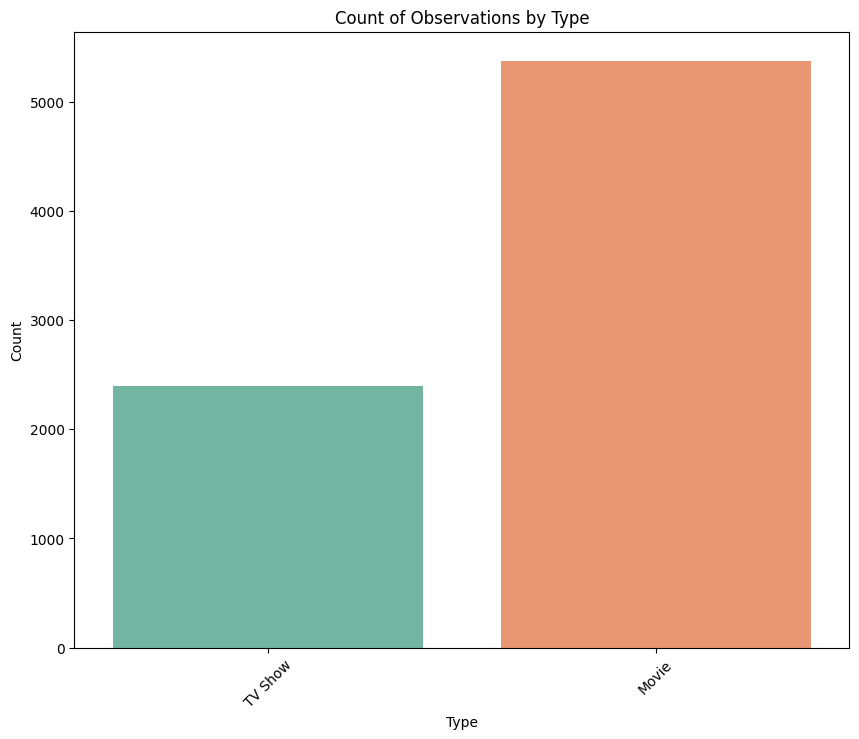

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='type', data=df, palette='Set2')  # You can choose a different palette

# Adding labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Observations by Type')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Netflix has 5372 movies and 2398 TV shows,
there are more   number movies on Netflix than TV shows.**


In [ ]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
# type should be a category
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

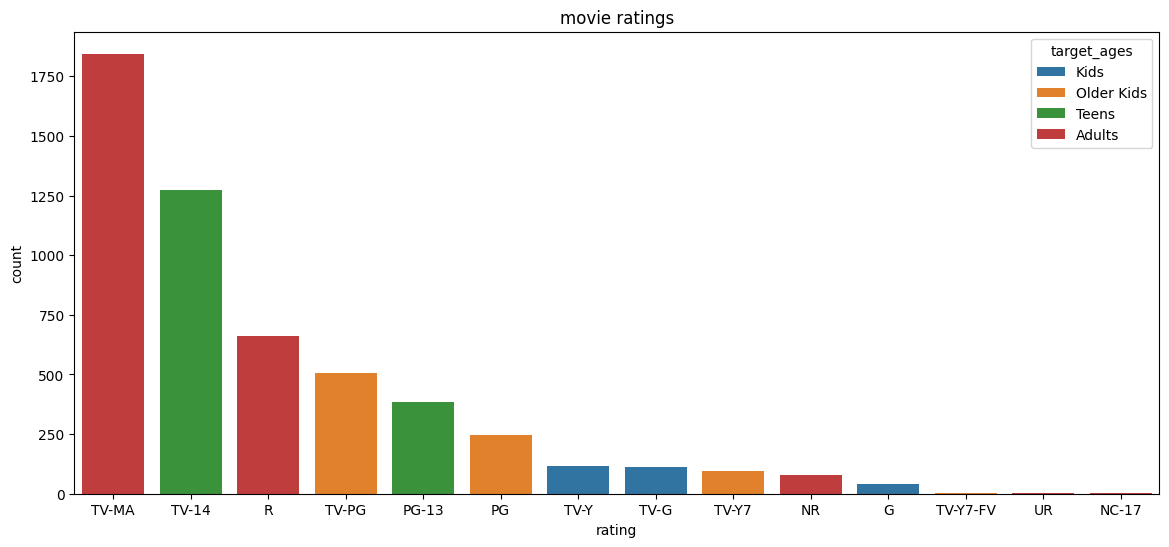

In [ ]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

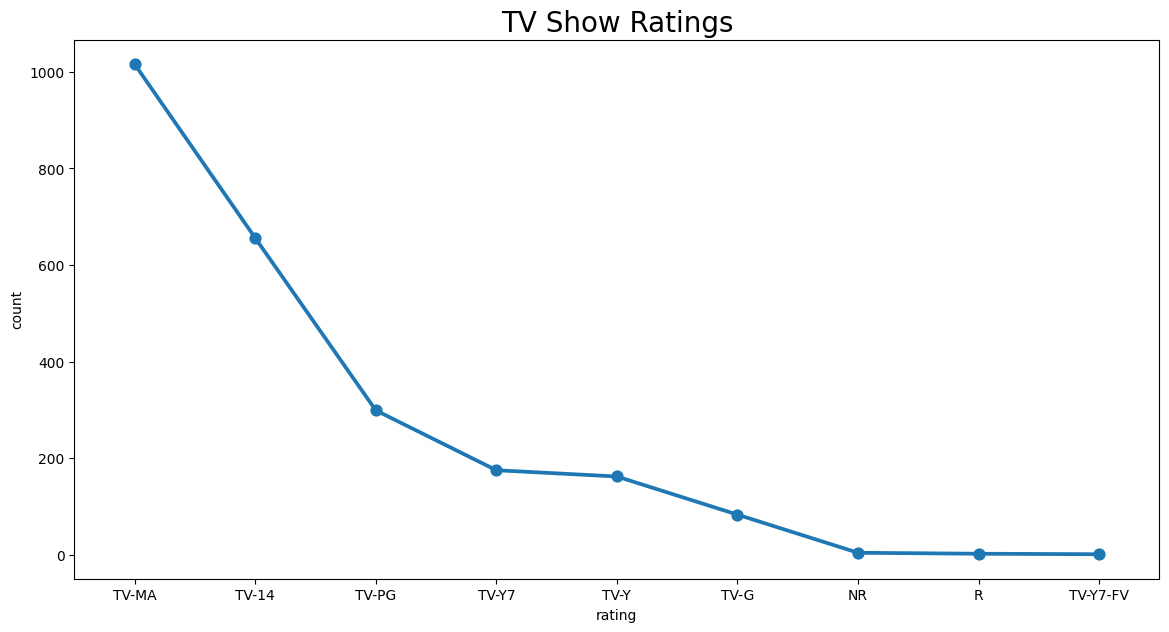

In [ ]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

In [ ]:
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)

In [ ]:
movies_year

2021     12
2020    411
2019    582
2018    734
2017    742
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [ ]:
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)

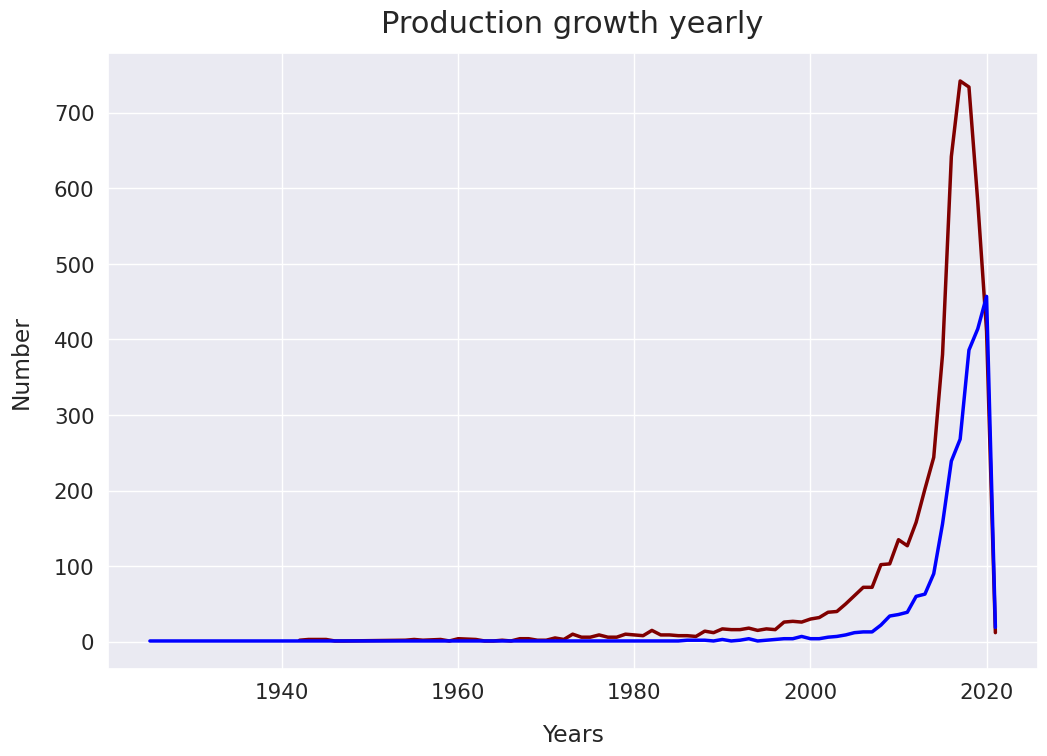

In [ ]:
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

<Axes: xlabel='count', ylabel='release_year'>

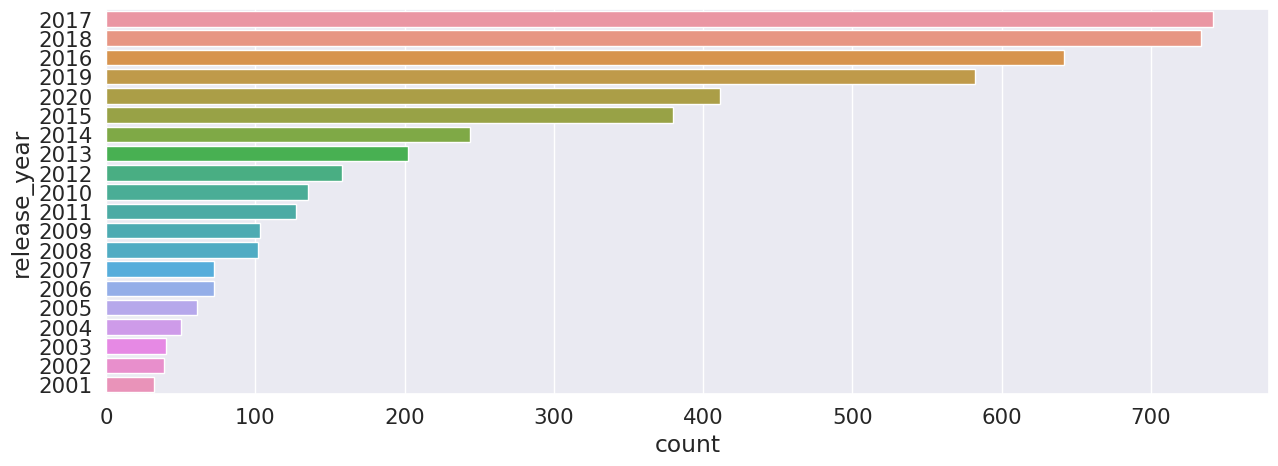

In [ ]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])


In [ ]:
tvshows_year

2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
2001      4
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      1
1993      4
1992      2
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1968      1
1967      1
1963      1
1946      1
1925      1
Name: release_year, dtype: int64

<Axes: xlabel='count', ylabel='release_year'>

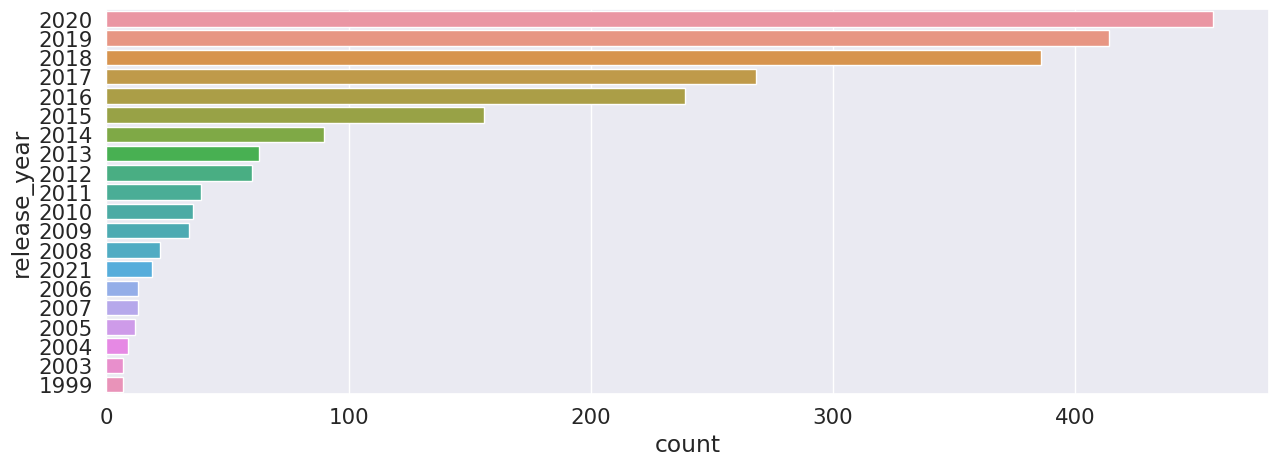

In [ ]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])

The number of movies on Netflix is growing significantly faster than the number of TV shows.

In both 2018 and 2019, approximately 1200 new movies were added.

We saw a huge increase in the number of movies and television episodes after 2014.

Because of covid-19, there is a significant drop in the number of movies and television episodes produced after 2019.

It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.


In [ ]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [ ]:
#adding columns of month and year of addition

df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


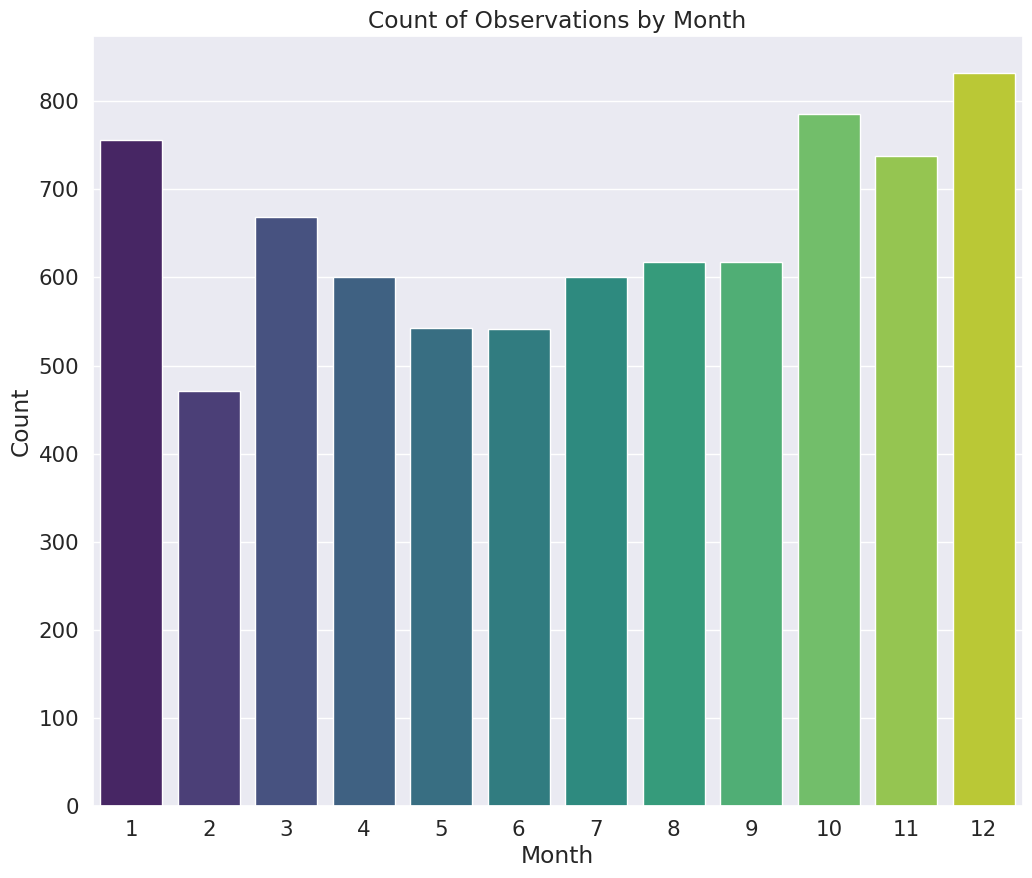

In [ ]:
# Plotting the Countplot
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='month', data=df, palette='viridis')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Observations by Month')

# Display the plot
plt.show()

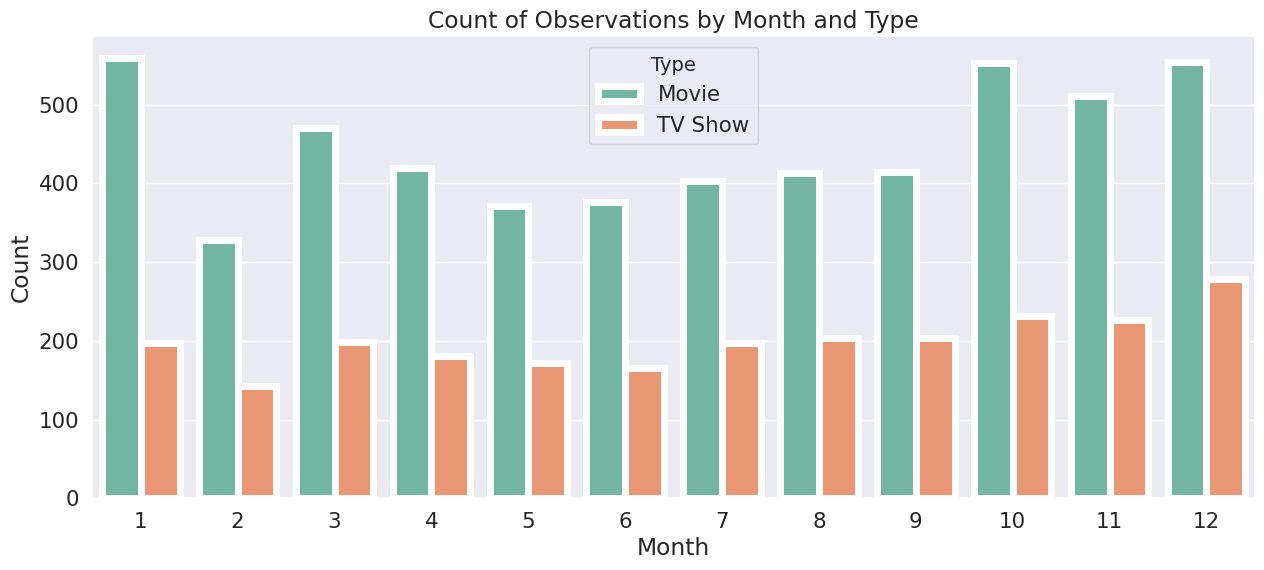

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x='month', hue='type', lw=5, data=df, ax=ax, palette='Set2')

ax.set(xlabel='Month', ylabel='Count', title='Count of Observations by Month and Type')
ax.legend(title='Type', title_fontsize='14')

plt.show()

The above graph shows that the most content is added to Netflix in December.


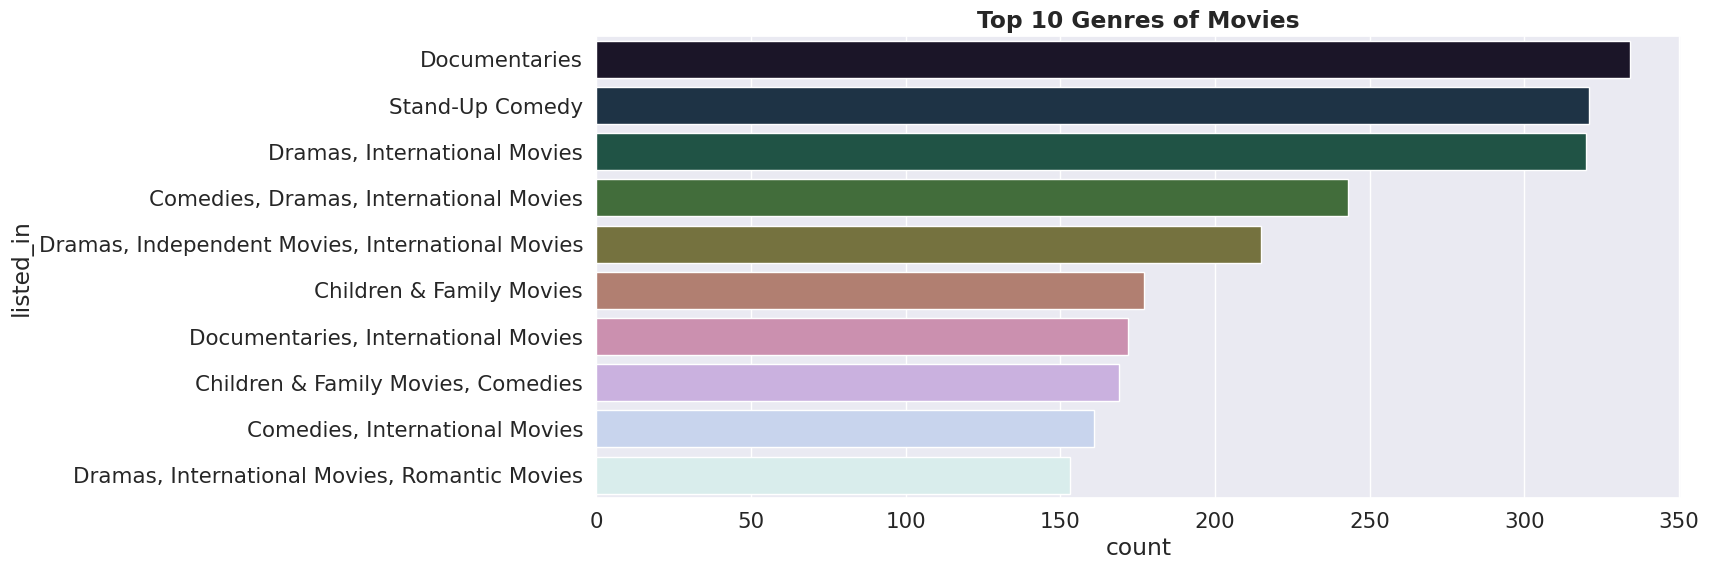

In [ ]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14, 6))
plt.title('Top 10 Genres of Movies', fontweight="bold")

sns.countplot(y='listed_in', data=movies, order=movies['listed_in'].value_counts().index[:10], palette="cubehelix")

plt.show()

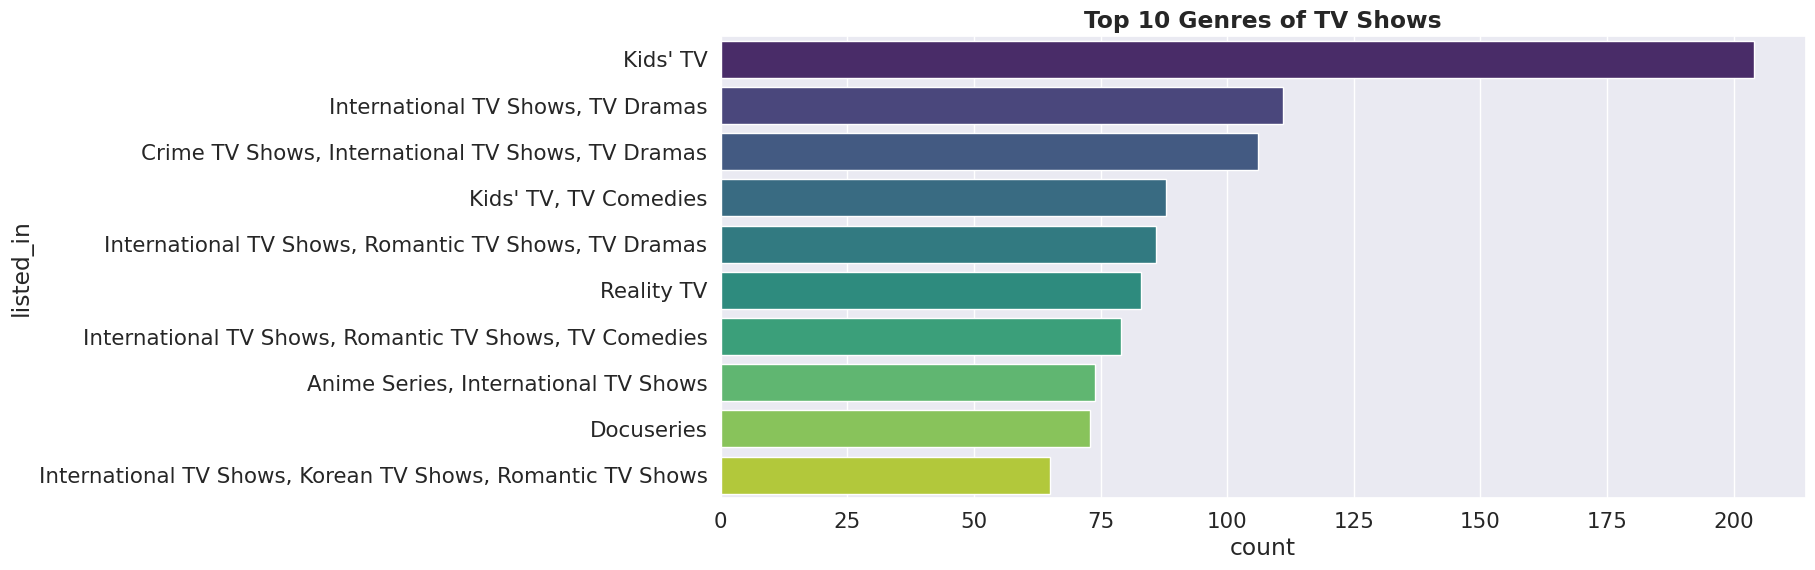

In [ ]:
# Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14, 6))
plt.title('Top 10 Genres of TV Shows', fontweight="bold")

sns.countplot(y='listed_in', data=tv_shows, order=tv_shows['listed_in'].value_counts().index[:10], palette="viridis")

plt.show()

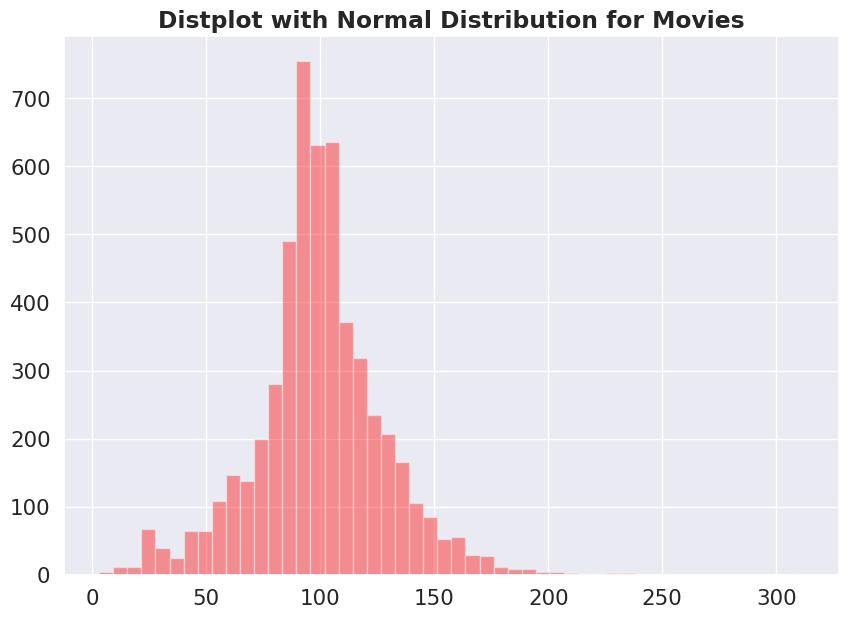

In [ ]:
# Checking the distribution of Movie Durations
plt.figure(figsize=(10, 7))
sns.distplot(movies['duration'].str.extract('(\d+)'), kde=False, color='red')
plt.title('Distplot with Normal Distribution for Movies', fontweight="bold")
plt.show()

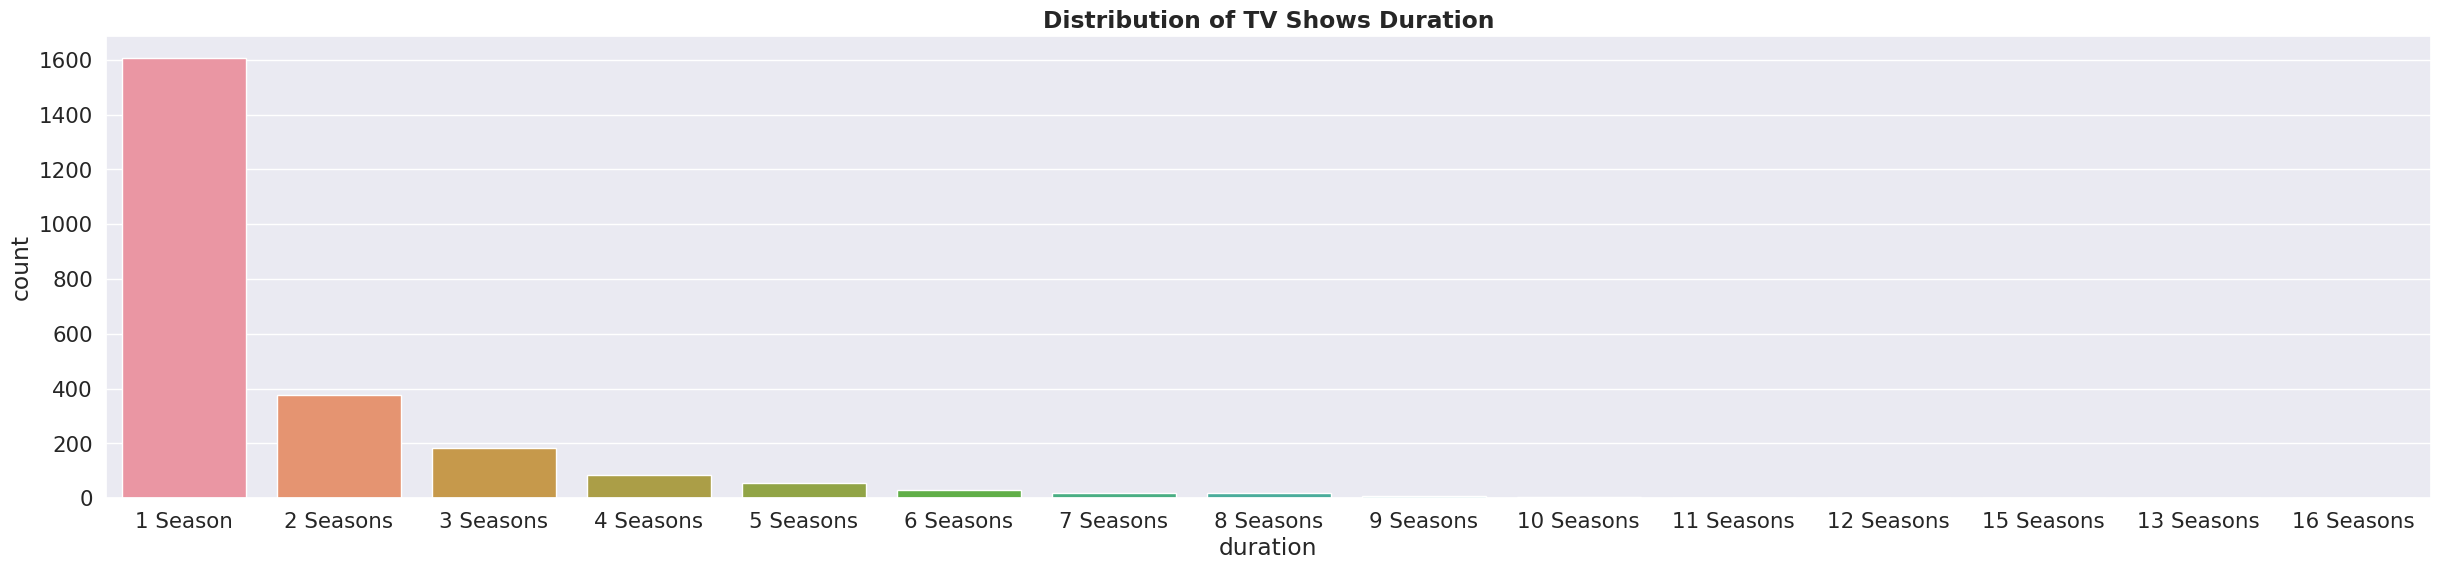

In [ ]:
# Checking the distribution of TV SHOWS
plt.figure(figsize=(30, 6))
plt.title("Distribution of TV Shows Duration", fontweight='bold')

sns.countplot(x='duration', data=tv_shows, order=tv_shows['duration'].value_counts().index)

plt.show()


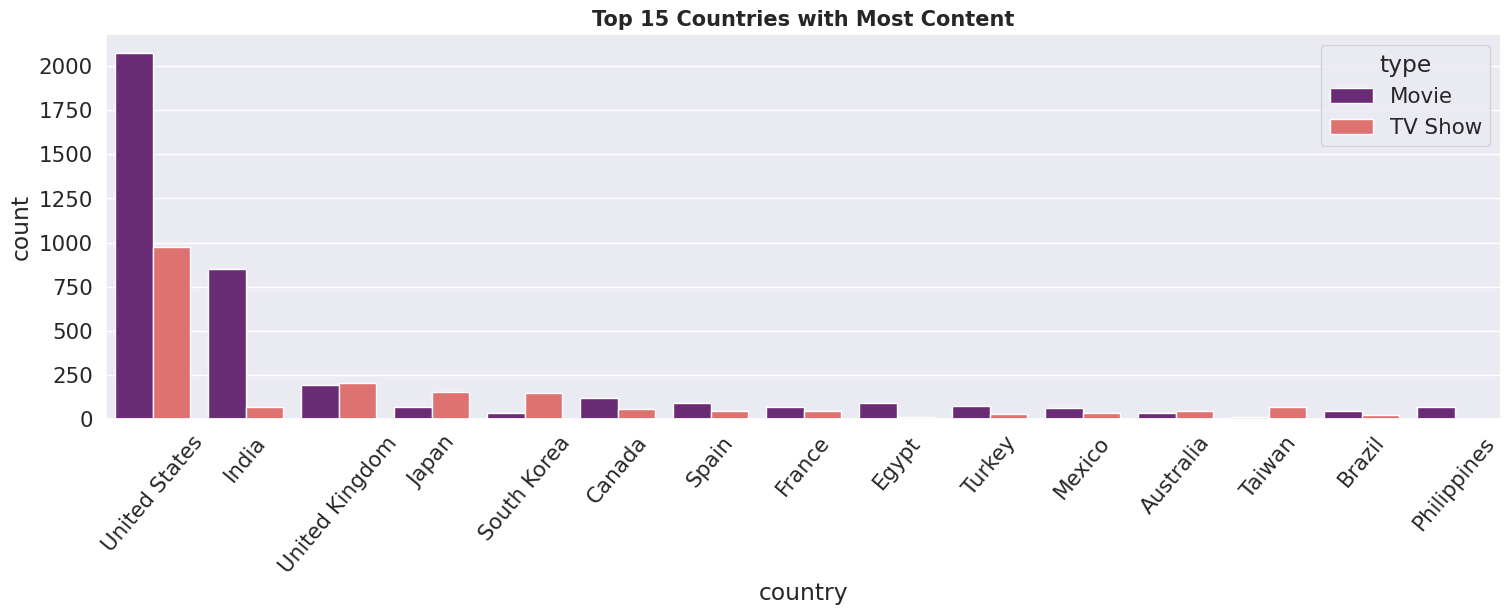

In [ ]:
# Analysing top 15 countries with most content
plt.figure(figsize=(18, 5))
sns.countplot(x='country', data=df, palette="magma", order=df['country'].value_counts().index[:15], hue='type')
plt.xticks(rotation=50)
plt.title('Top 15 Countries with Most Content', fontsize=15, fontweight='bold')
plt.show()


In [ ]:
# Top 2 countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country


,index,country
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


<BarContainer object of 11 artists>

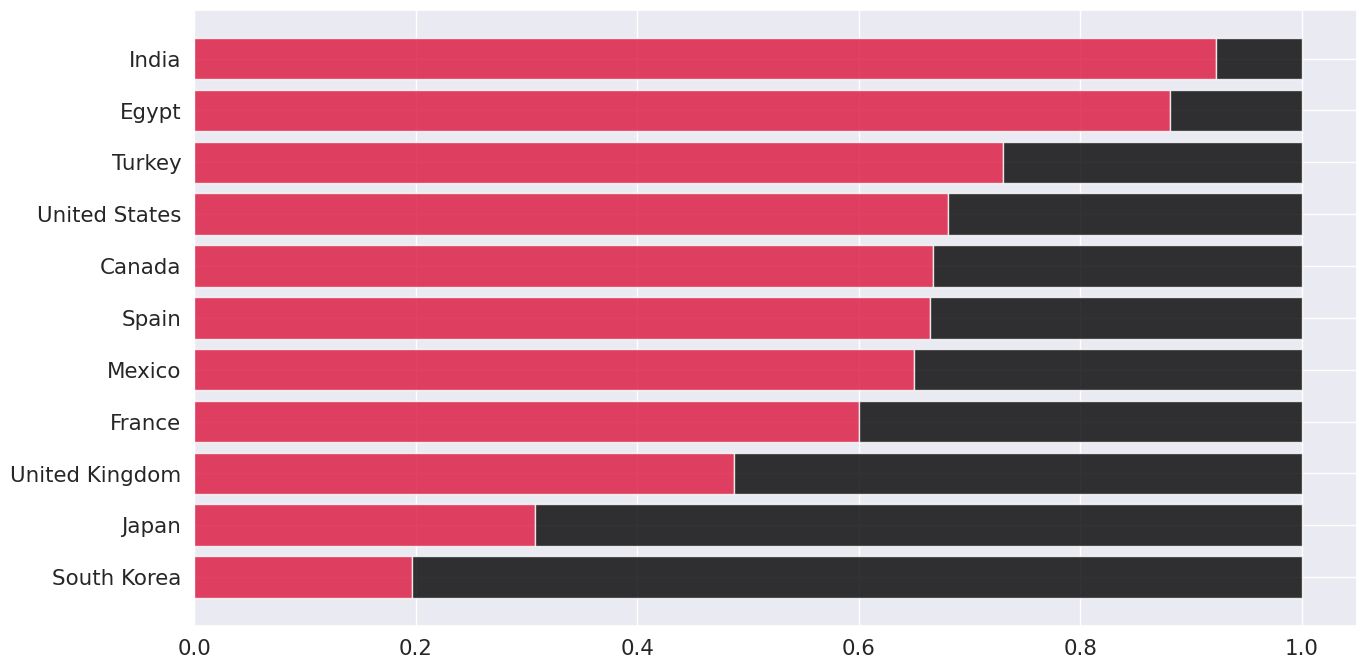

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the bar
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


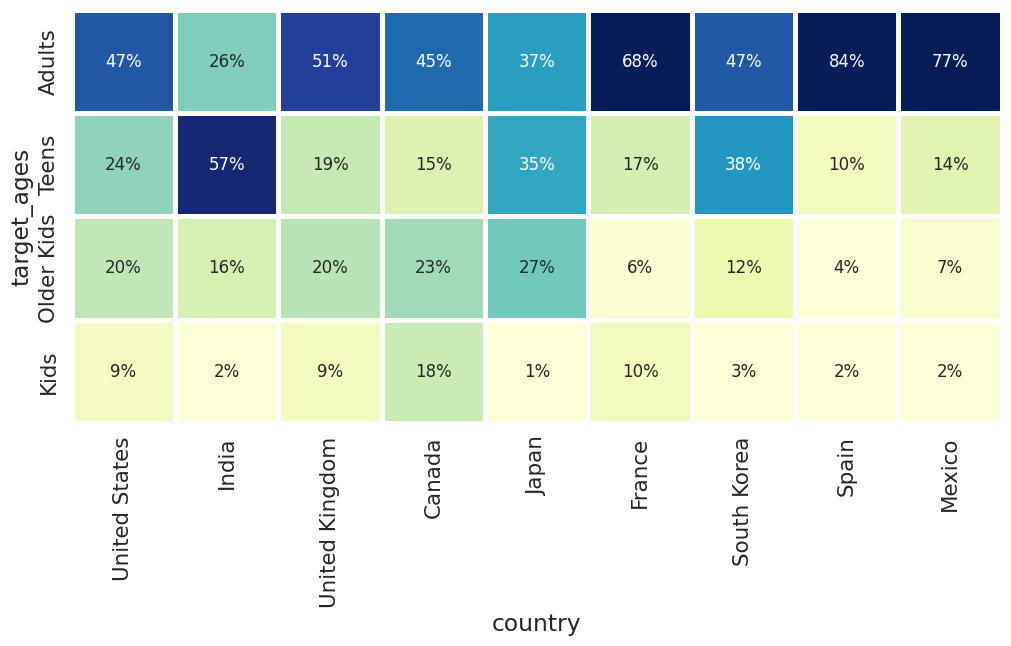

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

The US and UK are closely aligned with their Netflix target ages, but radically different from eg. India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.

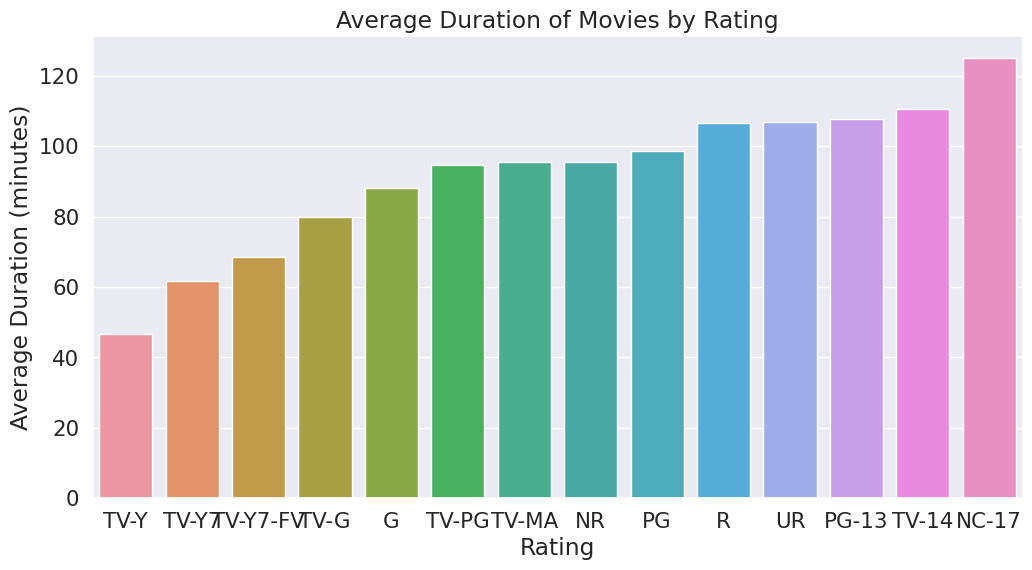

In [ ]:
# Extract numeric values from 'duration' and convert to numeric
movies['minute'] = movies['duration'].str.extract('(\d+)').astype(float)

# Calculate the average duration for each rating
duration_by_rating = movies.groupby(['rating'])['minute'].mean()

# Create a DataFrame and sort by average duration
duration_df = pd.DataFrame(duration_by_rating).sort_values('minute')

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=duration_df.index, y=duration_df['minute'])

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration of Movies by Rating')

plt.show()


Those movies that have a rating of NC-17 have the longest average duration.

When it comes to movies having a TV-Y rating, they have the shortest runtime on average.

In [ ]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10,1
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3,1
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9,1
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10,1


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1,2020
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1,2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1,2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10,1,2020
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3,1,2019
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9,1,2020
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10,1,2020


In [ ]:
# All the movies and TV shows in different dataframe
movies = df[df['type']=='Movie']
tv_shows= df[df['type']=='TV Show']

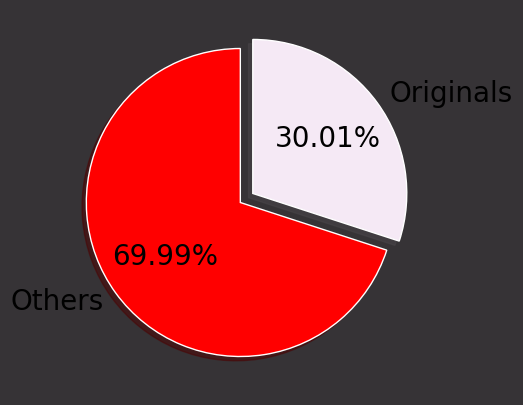

In [ ]:
# Adding a column to identify original movies
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')

# Pie plot showing the percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5, 5), facecolor="#363336")
ax.patch.set_facecolor('#363336')

# Explode the 'Originals' slice for emphasis
explode = (0, 0.1)

# Define colors for the slices
colors = ['red', '#F5E9F5']

# Create the pie plot
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels=['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color': "black", 'fontsize': 20}, colors=colors)

plt.show()

30% movies released on Netflix.
70% movies added on Netflix were released earlier by different mode.


#**Making some hypothesis**

HO: Netflix has more movies than TV Shows.
H1:Netflix not have more movies than TV SHOWS.

In [ ]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [ ]:
movies

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added,originals
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,2016,Yes
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1,2018,No
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1,2017,No
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1,2020,No
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Adults,6,1,2020,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,1,1,2020,No
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10,1,2020,No
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3,1,2019,No
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9,1,2020,No


In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [ ]:
np.mean(movies)

release_year    2012.918280
month              6.714073
count              1.000000
year_added      2018.481571
dtype: float64

In [ ]:
movies.duration

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5372, dtype: object

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1,2020
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1,2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1,2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1,2020


In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1,2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1,2017


In [ ]:
# Group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')

#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(M1, M2)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

nan
accept null hypothesis


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
# t-distribution
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

In [ ]:
# Making copy of df_clean_frame
df_hypothesis = df.copy()

# Displaying the head of df_hypothesis
df_hypothesis.head()


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1,2020
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1,2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1,2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1,2020


In [ ]:

# Extract numeric values from 'duration' using regular expressions
df_hypothesis['duration'] = df_hypothesis['duration'].str.extract('(\d+)')

# Convert the extracted values to numeric format with error handling
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'], errors='coerce')


In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1,2020
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1,2018


In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    99.330417
dtype: float64 
 Mean for  movies rated for older kids duration    1.761468
dtype: float64
Std for  movies rated for Older Kids duration    1.561099
dtype: float64 
 Std for  movies rated for kids duration    28.524206
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5372 2398
dof 7768
SP_2 = duration    252.749896
dtype: float64
SP duration    15.89811
dtype: float64
tvalue 249.88962005047787


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9602694215408423

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602694215408418

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies.

In [ ]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
year_added               int64
dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
year_added               int64
dtype: object

In [ ]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [ ]:
# After above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: str(x).split(' '))


In [ ]:
# Converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))

# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [ ]:
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [ ]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [ ]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Applying Tfidf Vectorizer
tfidf_model = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_model.fit_transform(df['description'])

# Converting the TF-IDF matrix to a dense array if needed
X = X_tfidf.toarray()

# Displaying the shape of the transformed matrix
print("Shape of X:", X.shape)


Shape of X: (7770, 5000)


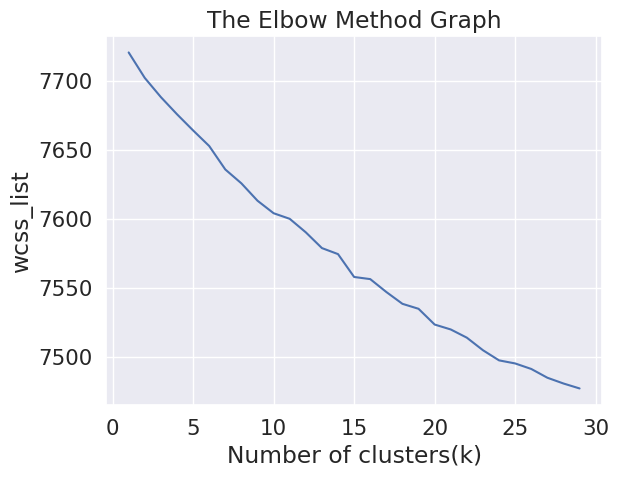

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0016
cluster: 4 	 Sillhoute: 0.0021
cluster: 5 	 Sillhoute: 0.0025
cluster: 6 	 Sillhoute: 0.0034
cluster: 7 	 Sillhoute: 0.0037
cluster: 8 	 Sillhoute: 0.0038
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0046
cluster: 12 	 Sillhoute: 0.0048
cluster: 13 	 Sillhoute: 0.0051
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0061
cluster: 16 	 Sillhoute: 0.0063
cluster: 17 	 Sillhoute: 0.0064
cluster: 18 	 Sillhoute: 0.0062
cluster: 19 	 Sillhoute: 0.0063
cluster: 20 	 Sillhoute: 0.0069
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0069
cluster: 23 	 Sillhoute: 0.0068
cluster: 24 	 Sillhoute: 0.0072
cluster: 25 	 Sillhoute: 0.0073
cluster: 26 	 Sillhoute: 0.0071
cluster: 27 	 Sillhoute: 0.0074
cluster: 28 	 Sillhoute: 0.0074
cluster: 29 	 Sillhoute: 0.0072


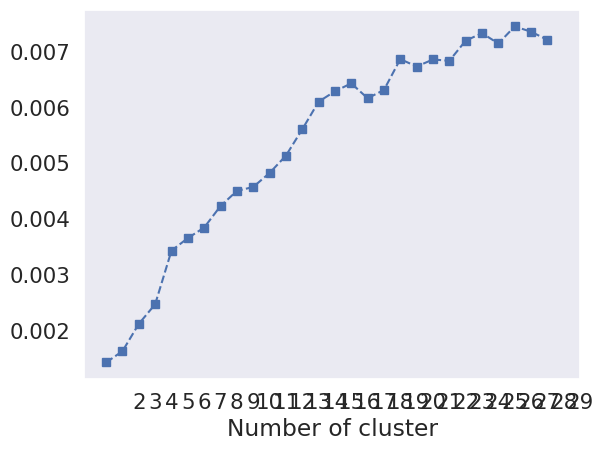

In [ ]:
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xticks(list(range(2,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

In [ ]:
# Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007218341785521539


In [ ]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [ ]:
df['cluster'].value_counts()

3     2504
2      532
11     331
5      319
18     289
14     284
1      271
7      268
23     234
12     232
10     224
17     223
16     209
8      205
19     192
15     189
21     175
4      158
0      155
24     150
22     140
9      138
20     108
25      89
13      79
6       72
Name: cluster, dtype: int64

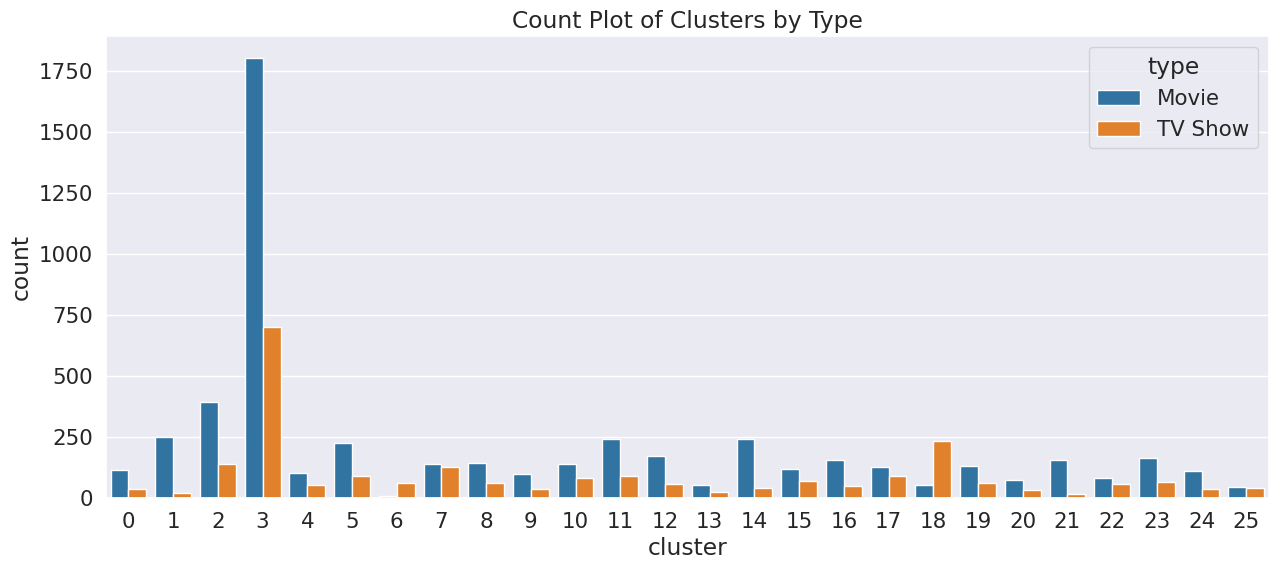

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='cluster', hue='type', data=df, palette='tab10', ax=ax)
plt.title('Count Plot of Clusters by Type')
plt.show()

In [ ]:
# Scatter plot for Clusters
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

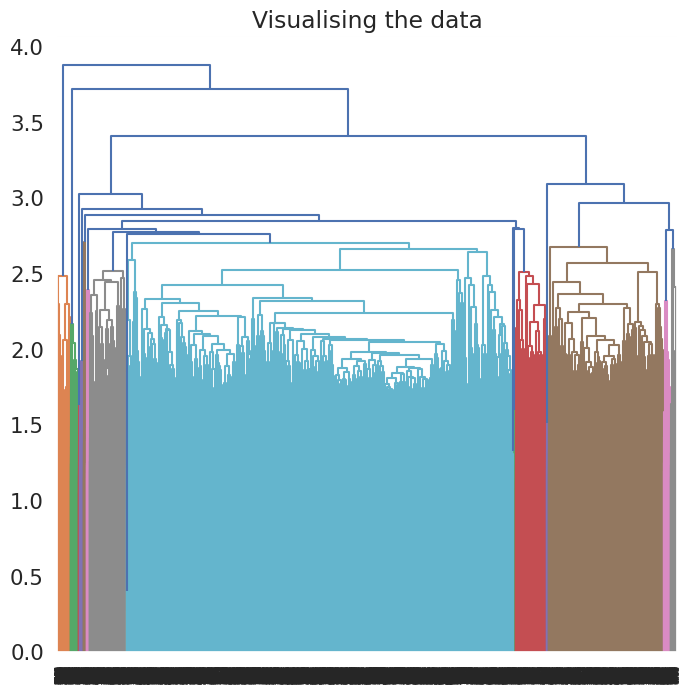

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,year_added,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,Adults,8,1,2020,1
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,Adults,12,1,2016,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,Adults,12,1,2018,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,Teens,11,1,2017,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,Teens,1,1,2020,0


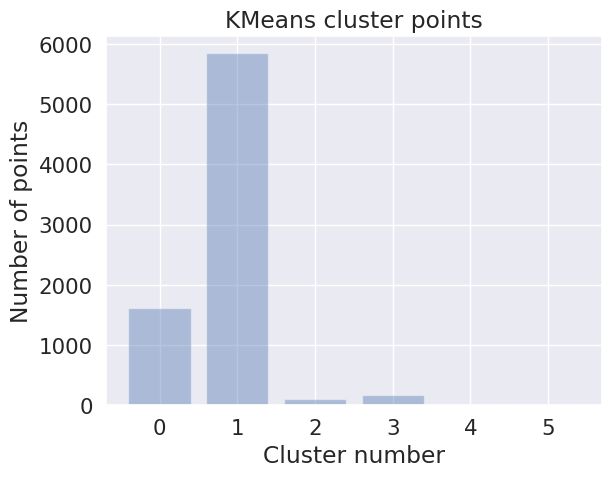

In [ ]:
#Analysing number of points present in each clusters
plt.bar([x for x in range(6)], df_hierarchical.groupby(['cluster'])['description'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, aggh.labels_, metric='euclidean'))

Silhouette Coefficient: -0.002


# **Conclusion**

● From elbow and sillhoute score, optimal of 26 clusters formed , K Means is best for identification than Hierarchical as the evaluation metrics also indicates the same.In kmean cluster 0 has the highest number of datapoints and evenly distributed for other cluster.

● Netflix has 5372 movies and 2398 TV shows, there are more movies on Netflix than TV shows.

● TV-MA has the highest number of ratings for tv shows i,e adult ratings.

● Highest number of movies released in 2017 and 2018 highest number of movies released in 2020 The number of movies on Netflix is growing significantly faster than the number of TV shows. We saw a huge increase in the number of movies and television episodes after 2015. There is a significant drop in the number of movies and television episodes produced after 2020. It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows.

● The most content is added to Netflix from october to january.

● Documentaries are the top most genre in netflix which is followed by standup comedy and Drama and international movies.

● Kids tv is the top most TV show genre in netflix.

● Most of the movies have duration of between 50 to 150.

● Highest number of tv_shows consisting of single season.

● Those movies that have a rating of NC-17 have the longest average duration.

● When it comes to movies having a TV-Y rating, they have the shortest runtime on average.

● United states has the highest number of content on the netflix ,followed by india.

● India has highest number of movies in netflix.

● 30% movies released on Netflix. 70% movies added on Netflix were released earlier by different mode.